In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model,datasets

In [ ]:
dataset=datasets.load_diabetes(as_frame=True,scaled=False)
input_features=dataset.feature_names
print("The independent variable(feature): ",input_features)
df=dataset.frame


In [62]:
#Input feature columns
input_df=dataset.data
print(input_df.head())

    age  sex   bmi     bp     s1     s2    s3   s4      s5    s6
0  59.0  2.0  32.1  101.0  157.0   93.2  38.0  4.0  4.8598  87.0
1  48.0  1.0  21.6   87.0  183.0  103.2  70.0  3.0  3.8918  69.0
2  72.0  2.0  30.5   93.0  156.0   93.6  41.0  4.0  4.6728  85.0
3  24.0  1.0  25.3   84.0  198.0  131.4  40.0  5.0  4.8903  89.0
4  50.0  1.0  23.0  101.0  192.0  125.4  52.0  4.0  4.2905  80.0


In [63]:
print(df.isnull().sum())

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64


In [64]:
#Target columns 
disease_progression=dataset.target
print("The dependent variable is")
print(disease_progression.head())

The dependent variable is
0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: target, dtype: float64


Text(0, 0.5, 'Diabetes Progression')

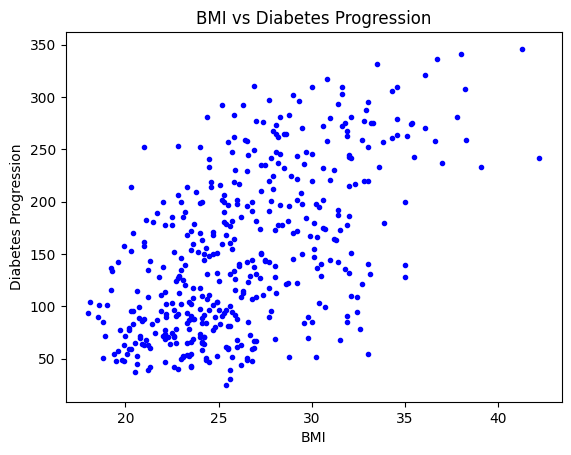

In [65]:
#BMI is the most likely thing that influence diabetes
plt.scatter(input_df['bmi'],disease_progression,color="blue",marker=".")
plt.title("BMI vs Diabetes Progression")
plt.xlabel("BMI")  
plt.ylabel("Diabetes Progression")

In [66]:
#Feeding the feature and target
X=input_df[['bmi']]
y=disease_progression

In [73]:
#Splitting between the test and train data
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [74]:
#Scaling--->  Z-Scaling= (x-mean)/std
from sklearn.preprocessing import StandardScaler

#Fit only the training data
scaler=StandardScaler()
scaler=scaler.fit(X_train)

In [75]:
#Transform both the training and test data
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

#Fit method take the scaled x_train and y_train and return the linear regression model
from sklearn.linear_model import LinearRegression
untrained_model=LinearRegression()
trained_model=untrained_model.fit(X_train,y_train)

In [79]:

intercept=trained_model.intercept_
coeff=trained_model.coef_
print('Intercept :',intercept)
print("Coefficient: ",coeff)

print(f"The linear eq of y=mx+c is y = {coeff[0]}*bmi+{intercept}")

Intercept : 151.60623229461754
Coefficient:  [47.98832087]
The linear eq of y=mx+c is y = 47.98832086873793*bmi+151.60623229461754


In [82]:
#Predicated disease progression for the tested BMI
y_pred=trained_model.predict(X_test)
print("The predicated value is:")
print(y_pred)

The predicated value is:
[255.17426905 211.79462571 161.0087018  129.26749936 196.98206457
 247.76798848 123.97729895 174.76322286 205.44638522 198.04010465
  95.41021675 198.04010465 115.5129783  107.04865765 239.30366783
 130.32553944  94.35217667 101.75845724  70.01725479 191.69186416
 180.05342327 163.12478196 128.20945928 209.67854555 206.5044253
 169.47302245 111.28081797 108.10669773 156.77654147 177.9373431
 149.3702609  100.70041716 141.96398033 140.90594025 146.19614066
 172.6471427  136.67377993 143.02202042 153.60242123 185.34362367
  88.00393618 141.96398033 145.13810058 148.31222082 182.16950343
  92.23609651 133.49965968 176.87930302 119.74513862 185.34362367
 130.32553944 105.99061756 170.53106253 144.0800605  194.86598441
 134.55769976 182.16950343 148.31222082 147.25418074 164.18282204
 192.74990424 175.82126294 201.2142249  131.38357952 211.79462571
 180.05342327  91.17805642 199.09814473 193.80794433  80.59765561
 127.15141919 127.15141919 122.91925887 188.51774392 

In [86]:
#Evaluate the model performance

from sklearn.metrics import mean_squared_error,r2_score

y_pred=trained_model.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

print("mse error:" , mse)
print("R^2 score: ", r2)

mse error: 4150.680189329985
R^2 score:  0.19057346847560108
